In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime


In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [29]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | san benito
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | plettenberg bay
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | ahipara
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | bathsheba
Processing Re

Processing Record 37 of Set 4 | mahibadhoo
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | pershotravneve
Processing Record 40 of Set 4 | tabou
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | kirovskiy
Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | evensk
Processing Record 45 of Set 4 | charters towers
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | kaduqli
Processing Record 48 of Set 4 | taoudenni
Processing Record 49 of Set 4 | salina
Processing Record 50 of Set 4 | chon daen
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | provost
Processing Record 4 of Set 5 | bukachacha
Processing Record 5 of Set 5 | la ronge
Processing Record 6 of Set 5 | amahai
Processing Record 7 of Set 5 | buqayq
City not found. Skipping...
Processing Record 8 of Set 5 | unye
C

Processing Record 20 of Set 8 | portoferraio
Processing Record 21 of Set 8 | ust-kuyga
Processing Record 22 of Set 8 | port hedland
Processing Record 23 of Set 8 | marsa matruh
Processing Record 24 of Set 8 | tierranueva
Processing Record 25 of Set 8 | gazanjyk
Processing Record 26 of Set 8 | leh
Processing Record 27 of Set 8 | antofagasta
Processing Record 28 of Set 8 | new norfolk
Processing Record 29 of Set 8 | kamenka
Processing Record 30 of Set 8 | bara
Processing Record 31 of Set 8 | porosozero
Processing Record 32 of Set 8 | chermoz
Processing Record 33 of Set 8 | asyut
Processing Record 34 of Set 8 | grand-santi
Processing Record 35 of Set 8 | vao
Processing Record 36 of Set 8 | puerto del rosario
Processing Record 37 of Set 8 | port hawkesbury
Processing Record 38 of Set 8 | buchanan
Processing Record 39 of Set 8 | ken caryl
Processing Record 40 of Set 8 | guiratinga
Processing Record 41 of Set 8 | richards bay
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of

Processing Record 6 of Set 12 | labuhan
Processing Record 7 of Set 12 | prince george
Processing Record 8 of Set 12 | poso
Processing Record 9 of Set 12 | bongaree
Processing Record 10 of Set 12 | buraydah
Processing Record 11 of Set 12 | los llanos de aridane
Processing Record 12 of Set 12 | kushima
Processing Record 13 of Set 12 | aasiaat
Processing Record 14 of Set 12 | williamsburg
Processing Record 15 of Set 12 | kaeo
Processing Record 16 of Set 12 | do gonbadan
Processing Record 17 of Set 12 | coahuayana
Processing Record 18 of Set 12 | ust-nera
Processing Record 19 of Set 12 | solnechnyy
Processing Record 20 of Set 12 | viedma
Processing Record 21 of Set 12 | guane
Processing Record 22 of Set 12 | canutama
Processing Record 23 of Set 12 | kawalu
Processing Record 24 of Set 12 | inirida
Processing Record 25 of Set 12 | souillac
Processing Record 26 of Set 12 | chapais
Processing Record 27 of Set 12 | mashhad
Processing Record 28 of Set 12 | kasempa
Processing Record 29 of Set 12 

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,28.0170,-97.5169,90.01,52,0,4.54,US,2021-09-18 16:04:58
1,Hobart,-42.8794,147.3294,46.26,74,90,4.00,AU,2021-09-18 16:00:17
2,San Benito,36.6166,-121.0844,49.80,55,12,3.74,US,2021-09-18 16:04:58
3,Butaritari,3.0707,172.7902,82.33,71,2,16.40,KI,2021-09-18 16:04:59
4,Castro,-24.7911,-50.0119,82.53,43,23,8.16,BR,2021-09-18 16:04:59
5,Plettenberg Bay,-34.0527,23.3716,60.94,71,100,21.59,ZA,2021-09-18 16:05:00
6,Ushuaia,-54.8000,-68.3000,43.36,62,11,3.51,AR,2021-09-18 16:01:07
7,Sao Joao Da Barra,-21.6403,-41.0511,84.29,66,12,15.68,BR,2021-09-18 16:05:00
8,Kavieng,-2.5744,150.7967,82.67,78,19,13.78,PG,2021-09-18 16:05:00
9,Bambous Virieux,-20.3428,57.7575,71.85,68,40,3.44,MU,2021-09-18 16:05:01


In [35]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]


In [36]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2021-09-18 16:04:58,28.0170,-97.5169,90.01,52,0,4.54
1,Hobart,AU,2021-09-18 16:00:17,-42.8794,147.3294,46.26,74,90,4.00
2,San Benito,US,2021-09-18 16:04:58,36.6166,-121.0844,49.80,55,12,3.74
3,Butaritari,KI,2021-09-18 16:04:59,3.0707,172.7902,82.33,71,2,16.40
4,Castro,BR,2021-09-18 16:04:59,-24.7911,-50.0119,82.53,43,23,8.16
...,...,...,...,...,...,...,...,...,...
571,Asau,RO,2021-09-18 16:08:22,46.4333,26.4000,64.76,67,12,5.86
572,Itoman,JP,2021-09-18 16:08:23,26.1247,127.6694,80.62,78,20,6.91
573,Belmonte,BR,2021-09-18 16:08:23,-15.8631,-38.8828,79.30,61,33,8.55
574,Pacifica,US,2021-09-18 16:08:23,37.6138,-122.4869,63.39,87,75,1.01


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data-cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

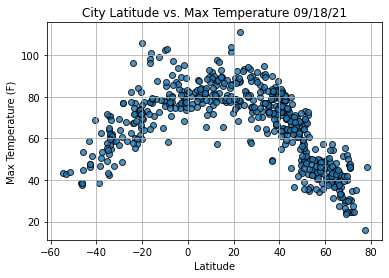

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data-Fig1.png")

# Show plot.
plt.show()

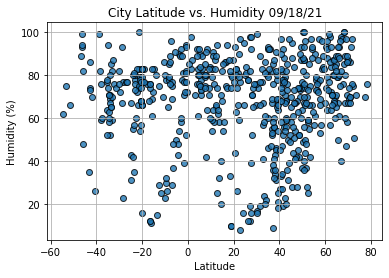

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data-Fig2.png")
# Show plot.
plt.show()

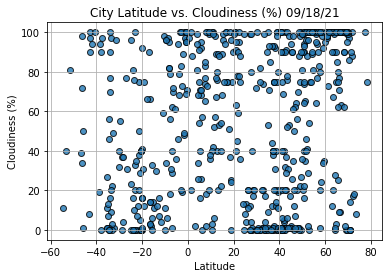

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data-Fig3.png")
# Show plot.
plt.show()

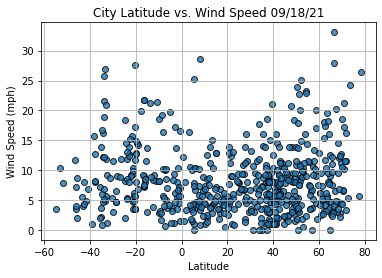

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data-Fig4.png")
# Show plot.
plt.show()